# Pulp 練習

In [1]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

## Example 1: Simple Linear Program

Let's start with a basic example to maximize $3x + 2y$ subject to the following constraints:
- $2x + y \leq 10$
- $x + 2y \leq 10$
- $x \geq 0, y \geq 0$

In [2]:
# Create the model
model = pulp.LpProblem(name="simple-lp-example", sense=pulp.LpMaximize)

# Define the variables
x = pulp.LpVariable(name="x", lowBound=0)  # x >= 0
y = pulp.LpVariable(name="y", lowBound=0)  # y >= 0

# Set the objective function
model += 3 * x + 2 * y, "Objective Function"

# Add the constraints
model += 2 * x + y <= 10, "Constraint 1"
model += x + 2 * y <= 10, "Constraint 2"

# Solve the model
model.solve()

# Print the results
print("Status:", pulp.LpStatus[model.status])
print("Optimal Solution:")
print("x =", x.value())
print("y =", y.value())
print("Objective =", pulp.value(model.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Sep 26 2023 

command line - /opt/conda/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/arm64/cbc /tmp/3f52bcecfe9f4a94af0b7211e08c24e5-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/3f52bcecfe9f4a94af0b7211e08c24e5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 4.9999998 (2)
0  Obj -0 Dual inf 4.9999998 (2)
2  Obj 16.666667
Optimal - objective value 16.666667
Optimal objective 16.66666667 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: Optimal
Optimal Solution:
x = 3.3333333
y = 3.

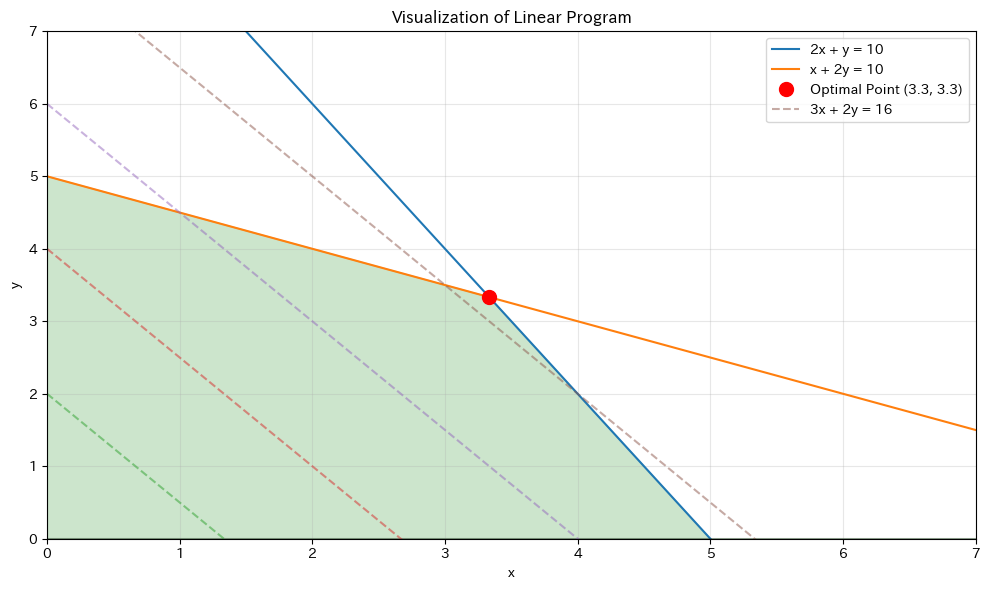

In [3]:
# Plotting the constraints and solution
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the feasible region
x_vals = np.linspace(0, 10, 1000)

# Constraint 1: 2x + y <= 10 => y <= 10 - 2x
y1_vals = 10 - 2 * x_vals
ax.plot(x_vals, y1_vals, label='2x + y = 10')

# Constraint 2: x + 2y <= 10 => y <= (10 - x) / 2
y2_vals = (10 - x_vals) / 2
ax.plot(x_vals, y2_vals, label='x + 2y = 10')

# Non-negativity constraints
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Fill feasible region
# Find the minimum value for each x between the two constraints and 0
y_min = np.minimum(y1_vals, y2_vals)
y_min = np.maximum(y_min, 0)  # Consider non-negativity
ax.fill_between(x_vals, 0, y_min, alpha=0.2, color='green')

# Mark the optimal solution
ax.plot(x.value(), y.value(), 'ro', markersize=10, label=f'Optimal Point ({x.value():.1f}, {y.value():.1f})')

# Add objective function contours
for z in range(0, 20, 4):
    if z == 0:
        continue
    # From 3x + 2y = z => y = (z - 3x) / 2
    objective_y = (z - 3 * x_vals) / 2
    ax.plot(x_vals, objective_y, '--', alpha=0.5, label=f'3x + 2y = {z}' if z == 16 else "")

ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Visualization of Linear Program')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

## Example 2: Production Planning Problem

A company produces two products, A and B. Each unit of product A generates $40 profit, while each unit of product B generates $30 profit. The company wants to maximize total profit.

**Constraints:**
- Materials: Product A requires 2 units of material, B requires 1 unit, and there are 100 units of material available.
- Labor: Product A requires 1 hour of labor, B requires 1.5 hours, and there are 80 hours of labor available.

In [4]:
# Create the model
model = pulp.LpProblem(name="production-planning", sense=pulp.LpMaximize)

# Define the variables
product_A = pulp.LpVariable(name="ProductA", lowBound=0)
product_B = pulp.LpVariable(name="ProductB", lowBound=0)

# Set the objective function (profit)
model += 40 * product_A + 30 * product_B, "Profit"

# Add the constraints
# Material constraint
model += 2 * product_A + product_B <= 100, "Material_Constraint"

# Labor constraint
model += product_A + 1.5 * product_B <= 80, "Labor_Constraint"

# Solve the model
model.solve()

# Print the results
print("Status:", pulp.LpStatus[model.status])
print("Optimal Production Plan:")
print("Product A:", product_A.value(), "units")
print("Product B:", product_B.value(), "units")
print("Maximum Profit: $", pulp.value(model.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Sep 26 2023 

command line - /opt/conda/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/arm64/cbc /tmp/66af00b152a54c019057cd98c804d0b3-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/66af00b152a54c019057cd98c804d0b3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 70 (2)
0  Obj -0 Dual inf 70 (2)
2  Obj 2300
Optimal - objective value 2300
Optimal objective 2300 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: Optimal
Optimal Production Plan:
Product A: 35.0 units
Product B: 30.0 units


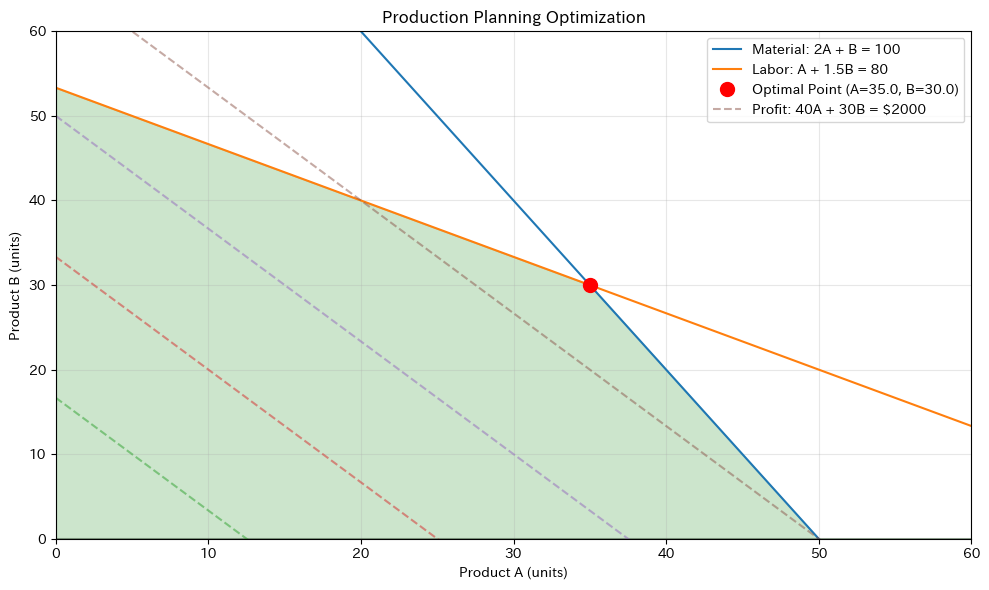

In [5]:
# Plotting the constraints and solution
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the feasible region
x_vals = np.linspace(0, 60, 1000)

# Material constraint: 2A + B <= 100 => B <= 100 - 2A
y1_vals = 100 - 2 * x_vals
ax.plot(x_vals, y1_vals, label='Material: 2A + B = 100')

# Labor constraint: A + 1.5B <= 80 => B <= (80 - A) / 1.5
y2_vals = (80 - x_vals) / 1.5
ax.plot(x_vals, y2_vals, label='Labor: A + 1.5B = 80')

# Non-negativity constraints
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Fill feasible region
y_min = np.minimum(y1_vals, y2_vals)
y_min = np.maximum(y_min, 0)  # Consider non-negativity
ax.fill_between(x_vals, 0, y_min, alpha=0.2, color='green')

# Mark the optimal solution
ax.plot(product_A.value(), product_B.value(), 'ro', markersize=10, 
        label=f'Optimal Point (A={product_A.value():.1f}, B={product_B.value():.1f})')

# Add objective function contours
for z in range(0, 2500, 500):
    if z == 0:
        continue
    # From 40A + 30B = z => B = (z - 40A) / 30
    objective_y = (z - 40 * x_vals) / 30
    ax.plot(x_vals, objective_y, '--', alpha=0.5, 
            label=f'Profit: 40A + 30B = ${z}' if z == 2000 else "")

ax.set_xlim(0, 60)
ax.set_ylim(0, 60)
ax.set_xlabel('Product A (units)')
ax.set_ylabel('Product B (units)')
ax.set_title('Production Planning Optimization')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

## Example 3: Diet Problem

The diet problem aims to find the cheapest combination of foods that will satisfy all the nutritional requirements of a person.

In this example, we'll solve a simplified diet problem with 5 foods and 3 nutritional requirements.

In [9]:
# Create the model
model = pulp.LpProblem(name="diet-problem", sense=pulp.LpMinimize)

# Foods and their costs per unit
foods = {
    "Bread": 2.0,
    "Milk": 3.5,
    "Cheese": 8.0,
    "Potato": 1.5,
    "Fish": 11.0
}

# Nutritional content per unit of food
protein = {
    "Bread": 4,
    "Milk": 8,
    "Cheese": 7,
    "Potato": 1.5,
    "Fish": 8
}

fat = {
    "Bread": 1,
    "Milk": 5,
    "Cheese": 9,
    "Potato": 0.1,
    "Fish": 7
}

carbs = {
    "Bread": 15,
    "Milk": 11.7,
    "Cheese": 0.4,
    "Potato": 22,
    "Fish": 0
}

# Minimum and maximum nutritional requirements
min_protein = 50  # minimum protein required (g)
max_fat = 65      # maximum fat allowed (g)
min_carbs = 130   # minimum carbohydrates required (g)

# Define variables: how much of each food to include in diet
amounts = pulp.LpVariable.dicts("Amount", foods.keys(), lowBound=0)

# Set objective: minimize cost
model += pulp.lpSum([foods[f] * amounts[f] for f in foods]), "Total Cost"

# Add constraints
model += pulp.lpSum([protein[f] * amounts[f] for f in foods]) >= min_protein, "MinProtein"
model += pulp.lpSum([fat[f] * amounts[f] for f in foods]) <= max_fat, "MaxFat"
model += pulp.lpSum([carbs[f] * amounts[f] for f in foods]) >= min_carbs, "MinCarbs"

# Solve the model
model.solve()

# Print the results
print("Diet Problem Results:")
print("Status:", pulp.LpStatus[model.status])
print("\nOptimal Diet:")
for f in foods:
    if amounts[f].value() > 0.01:  # Allow for small numerical error
        print(f"{f}: {amounts[f].value():.2f} units")

# Calculate nutritional content of the optimal diet
total_protein = sum(protein[f] * amounts[f].value() for f in foods)
total_fat = sum(fat[f] * amounts[f].value() for f in foods)
total_carbs = sum(carbs[f] * amounts[f].value() for f in foods)

print("\nNutritional Content:")
print(f"Protein: {total_protein:.2f}g (min: {min_protein}g)")
print(f"Fat: {total_fat:.2f}g (max: {max_fat}g)")
print(f"Carbohydrates: {total_carbs:.2f}g (min: {min_carbs}g)")
print(f"\nTotal Cost: ${pulp.value(model.objective):.2f}")

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Sep 26 2023 

command line - /opt/conda/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/arm64/cbc /tmp/62284ed91f1e4bbfa3c7b85e5dd729dc-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/62284ed91f1e4bbfa3c7b85e5dd729dc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 28 RHS
At line 32 BOUNDS
At line 33 ENDATA
Problem MODEL has 3 rows, 5 columns and 14 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 5 (0) columns and 14 (0) elements
0  Obj 0 Primal inf 12.159091 (2)
2  Obj 23.428962
Optimal - objective value 23.428962
Optimal objective 23.42896175 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01

Diet Problem Results:
Status: Optimal

Optimal Diet:
Bread: 6.22 units
Milk: 3.14 units



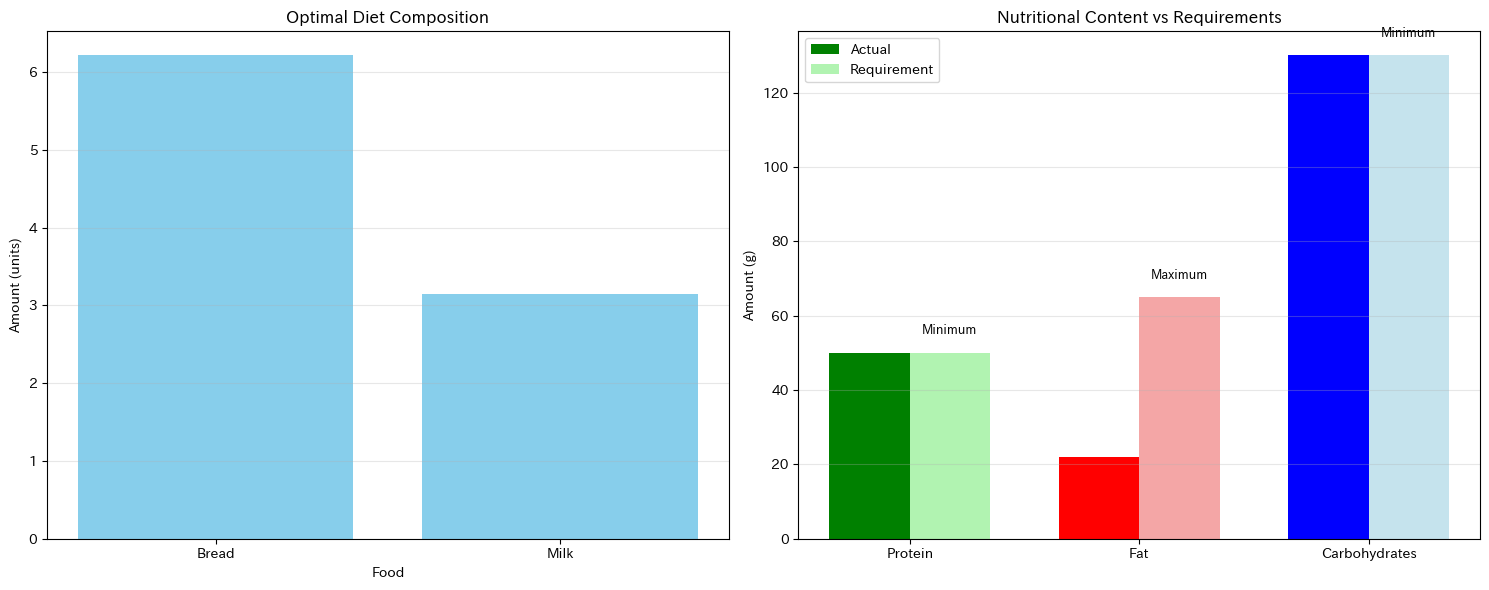

In [10]:
# Create bar charts for the optimal diet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Food amounts
diet_foods = []
diet_amounts = []

for f in foods:
    if amounts[f].value() > 0.01:  # Allow for small numerical error
        diet_foods.append(f)
        diet_amounts.append(amounts[f].value())

# Plot food amounts
ax1.bar(diet_foods, diet_amounts, color='skyblue')
ax1.set_title('Optimal Diet Composition')
ax1.set_xlabel('Food')
ax1.set_ylabel('Amount (units)')
ax1.grid(axis='y', alpha=0.3)

# Nutritional content
nutrients = ['Protein', 'Fat', 'Carbohydrates']
amounts = [total_protein, total_fat, total_carbs]
requirements = [min_protein, max_fat, min_carbs]
req_types = ['Minimum', 'Maximum', 'Minimum']
colors = ['green', 'red', 'blue']

x = np.arange(len(nutrients))
width = 0.35

ax2.bar(x, amounts, width, label='Actual', color=colors)
ax2.bar(x + width, requirements, width, label='Requirement', color=['lightgreen', 'lightcoral', 'lightblue'], alpha=0.7)

ax2.set_title('Nutritional Content vs Requirements')
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(nutrients)
ax2.set_ylabel('Amount (g)')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add text labels for requirement types
for i, (req, req_type) in enumerate(zip(requirements, req_types)):
    ax2.text(i + width, req + 5, req_type, ha='center', fontsize=9)

plt.tight_layout()
plt.show()